In [1]:
from numpy import *
import matplotlib.pyplot as plt
from LRFutils import archive
from LRFutils import log as logs
from LRFutils.color import Color

import Sky
import Pupil

---
# Config

## Sky

In [2]:
# Image size (in pixels)
N = 101

## Telescope

In [3]:
# Pupil radius (in pixels)
pupil_radius = N/2.2

# Obstruction radius (in pixels)
obstruction_radius = N/20

# Arms
arms_count = 3

# Arms size (in pixels)
arms_size = 5

# Arms angle (in radians)
arms_angle = 0

---
# Script

In [4]:
# %%timeit
# shot, starList = Sky.create(N, nb_stars=1000, fwhm=3, mag=arange(0,30), mag_prob=arange(1,31)**2, noise_mag=10, noise_std=0.1)

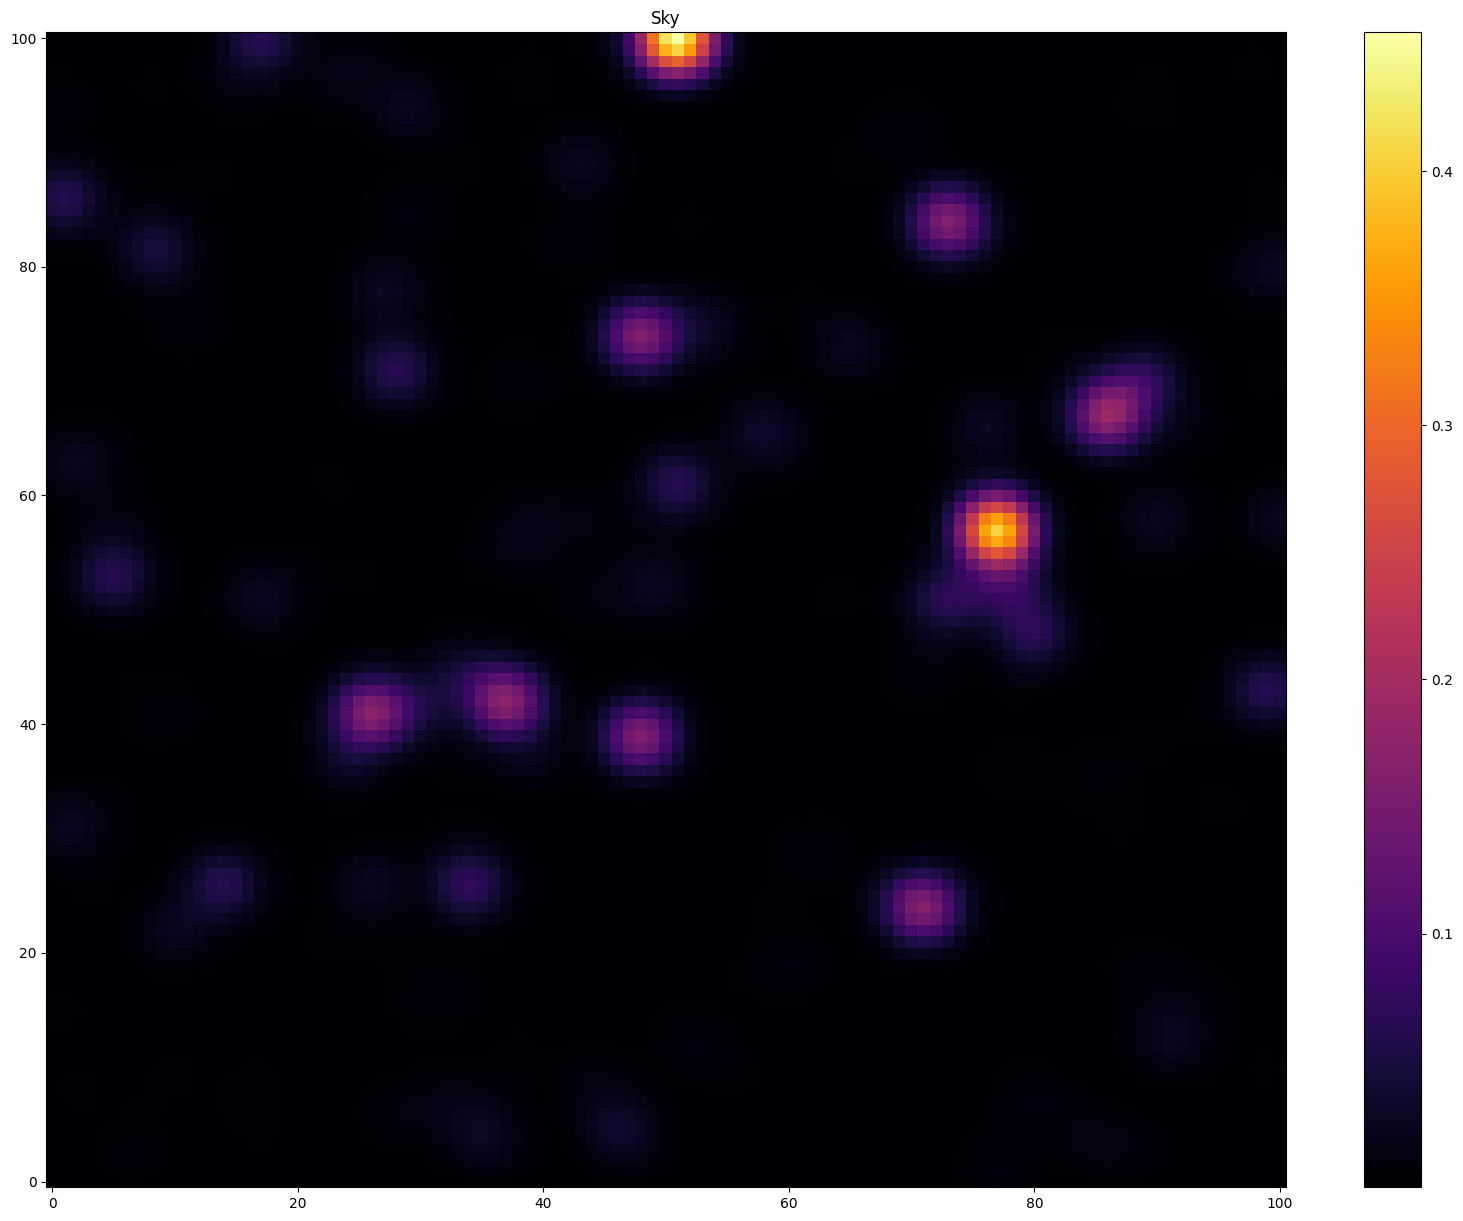

In [5]:
shot, starList = Sky.create(N, nb_stars=10000, fwhm=3, mag=arange(0,30), mag_prob=arange(1,31)**2, noise_mag=10, noise_std=0.1)
# shot, starList = Sky.create(N, nb_stars=1, fwhm=1, mag=[0], mag_prob=[1], noise_mag=5, noise_std=0.1)

plt.figure(figsize=(20,15))
plt.pcolor(range(N),range(N), shot, shading='auto', cmap="inferno")
plt.colorbar()
plt.title("Sky")
plt.show()

In [6]:
pupil = Pupil.create(N, pupil_radius, obstruction_radius, arms_count, arms_size, arms_angle)

plt.pcolor(range(N),range(N),pupil, shading='auto', cmap="gray")
plt.colorbar()
plt.title("Pupil")
plt.show()

KeyError: "Unrecognized options: {'parrallel'}. Known options are dict_keys(['_dbg_extend_lifetimes', '_dbg_optnone', '_nrt', 'boundscheck', 'debug', 'error_model', 'fastmath', 'forceinline', 'forceobj', 'inline', 'looplift', 'no_cfunc_wrapper', 'no_cpython_wrapper', 'no_rewrites', 'nogil', 'nopython', 'parallel', 'target_backend'])"

In [ ]:
shot_freq = roll(fft.fft2(shot), (N//2, N//2), (0,1))
pupil_diff_profile = roll(fft.fft2(pupil), (N//2, N//2), (0,1))
observation_freq = shot_freq * pupil
observation = fft.ifft2(observation_freq)

In [ ]:
plt.figure(figsize=(20,15))
plt.pcolor(range(N-50),range(N-50), abs(observation[25:N-25,25:N-25]), shading='auto', cmap="inferno")
plt.colorbar()
plt.title("Observation")
plt.show()